<a href="https://colab.research.google.com/github/Yogesh6301/Deep-Learning-with-Wine-dataset/blob/main/DeepLearning_with_Wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
redWine = pd.read_csv(red, sep=";")
whiteWine = pd.read_csv(white, sep=";")

In [4]:
redWine.shape

(1599, 12)

In [5]:
redWine["Type"] = 0
whiteWine["Type"] = 1

In [6]:
wineData = whiteWine.append(redWine, ignore_index=True)

In [7]:
wineData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [8]:
x = wineData.iloc[:, :-1].values
y = wineData.iloc[:, -1].values

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
scaller = StandardScaler()

In [11]:
newX = scaller.fit_transform(x)

In [12]:
trainX, testX, trainY, testY = train_test_split(newX, y, test_size = 0.3)

In [13]:
trainY

array([0, 0, 1, ..., 1, 1, 1])

In [14]:
#### Deep Learning.....

In [15]:
import tensorflow

In [17]:
!pip install tensorflow

In [18]:
tensorflow.__version__

'2.5.0'

In [19]:
#### model ----> layers--->
### Layers ---> NoOfNu... with Activations Fun...
### Opt ----> Reduce My Error...

In [20]:
## create Network...
### ---> Def your model...
### ---> add your layers ---> Dense, Conv, Do.....
### ---> choose your number of Nu for Layers..
### ----> Select Af....
#### --->Select Op....
#### --> define your error....
#### --> train your model...

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

In [23]:
#### hidden layer
model.add(Dense(12, activation = "relu", input_shape = (12,)))

### output Layer..
model.add(Dense(1, activation = "sigmoid"))

In [24]:
#### manage your error..
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [25]:
h = model.fit(trainX, trainY, epochs=20, validation_split=0.3, batch_size = 250)

Epoch 1/20
13/13 [==============================] - 1s 12ms/step - loss: 0.6094 - accuracy: 0.7278 - val_loss: 0.5595 - val_accuracy: 0.7678
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5511 - accuracy: 0.7753 - val_loss: 0.5079 - val_accuracy: 0.8044
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.8048 - val_loss: 0.4604 - val_accuracy: 0.8308
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8360 - val_loss: 0.4170 - val_accuracy: 0.8557
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8614 - val_loss: 0.3772 - val_accuracy: 0.8777
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8853 - val_loss: 0.3401 - val_accuracy: 0.8945
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.9057 - val_loss: 0.3065 - val_accuracy: 0.9136
Epoch 8/20
13/13 [=

In [26]:
#h.history

In [27]:
loss = h.history["loss"]
acc = h.history["accuracy"]
val_loss = h.history["val_loss"]
val_acc = h.history["val_accuracy"]

In [28]:
tvA = pd.DataFrame({
    "Ta":acc,
    "Va":val_acc
})

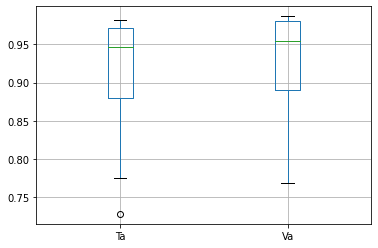

In [29]:
tvA.boxplot()
plt.show()

In [30]:
trainX.shape[0]

4547

In [31]:
4547 * 0.7

3182.8999999999996

In [32]:
predTest = model.predict_classes(testX)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
predTest

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [34]:
predTest = predTest.reshape(-1)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(predTest, testY)

0.9866666666666667